In [ ]:

#---------------------------------------Analyzing Road Accident Data-------------------------------#

## Introduction and Dataset Description

In this notebook, I will be analyzing a dataset containing information about road accidents between 
the years 2008 and 2022. The source of data is Destatis Genesis online. Since the source data was not in 
a good form to conduct analysis directly, as part of data collection, I have done several manual reformation 
on datasets such as selecting and removing proper columns and rows, categorical and numerical value checks if 
it is in proper data types or not and overall selecting enough and related data for desired research questions.

Hence, the dataset contains the following columns with 90 rows and 15 years of periods:
    
  - Year                (The column indicates the distinctive years that accident happened)
  - Persons killed      (It denotes the number of deaths count in different scenarios and years)
  - Seriously injured   (It denotes the number of serious injuries in different scenarios and years)
  - Slightly injured    (It denotes the number of minor injuries in different scenarios and years)
  - Kind of accident    (The column includes three accident types such as driving, crossing and turning accidents)
  - Area type           (It covers two locatios where accident happened such as inner town and out of town)

With these data, I will conduct data analysis and data visualization to make the data easier to understnd, 
and extract meaningfull insighst from the data. To do that

Before Answering research question, I will coduct data preprocessing such as checking null values, 
correcting or removing corrupt or inaccurate records from the dataset. Also, to make an easier understanding 
of data, I will conduct some necessary data expolartion with various data expoloration features including 
data visualization.

So, after all data preprocessing, data expolration and visalization

I will be answering following research questions with more detailed exploratory data analysis:

1. During the crossing car, which year did most death cases occur in inner town?
2. What is the main type of accident that has caused most death cases over the years?
3. For which area (inner town/out of town) has the least serious injury over the period?
4. What are the turning accident (one of the accident types) trends between the years 2013 to 2022 that fluctuated in terms of slightly injured occurrence?
5. How have the number of deaths, serious injuries, and slightly injured cases varied in recent (last 5) years due to driving accidents?

    
    
    
    

In [ ]:
Let's start by loading the dataset and exploring its contents and performing any necessary data preprocessing steps.


In [66]:
# To conduct overall EDA (Exploratory data analysis), we required several python library. Using !pip, we Install necessary libraries below:

!pip install matplotlib 
!pip install numpy 
!pip install pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 5.1 MB/s eta 0:00:00:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 k

In [5]:
# Since we had installed all libraries, to make them use, we import it to notebook.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# In this step, we load the datasets from the data directory.

dataset_path = "/Users/borhan/Desktop/Potsdam Study/Research Software/Project_RSE_824909/data/Traffic accident.csv"

In [6]:
# Using pandas we read the dataset as dataframe, A dataframe is a data structure constructed with rows and columns, similar to a database or Excel spreadsheet. It allows data to align in a tabular fashion in rows and columns

df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe

df.head()

,Year,Persons killed,Seriously injured,Slightly injured,Kind of accident,Area type
0,2008,288,6797,18293,Driving accident,inner town
1,2009,294,6719,18346,Driving accident,inner town
2,2010,251,5864,16825,Driving accident,inner town
3,2011,244,6459,16602,Driving accident,inner town
4,2012,221,6177,16626,Driving accident,inner town


In [82]:
# This code is to check the dataset's total columns and rows to get an overview of rows and coulumn in dataset.

print("Number of rows and columns:", df.shape)

Number of rows and columns: (90, 6)


In [83]:
# Before heading to analyse data, we need to check certain inconsistency in datasets which are a part data preprocessing. 
# Check for missing values in datsets in one of them. This may include handling missing values, data cleaning, etc.
# After checking if there are any null, we have to handle them like replace NA in null place, otherwise continue analysing.

df.isnull().sum()

Year                 0
Persons killed       0
Seriously injured    0
Slightly injured     0
Kind of accident     0
Area type            0
dtype: int64

In [84]:
# There are two kind of values in datsets: categorical and numerical. this code snippet provides a Summary statistics for categorical columns

df.describe(include=['object'])

,Kind of accident,Area type
count,90,90
unique,3,2
top,Driving accident,inner town
freq,30,45


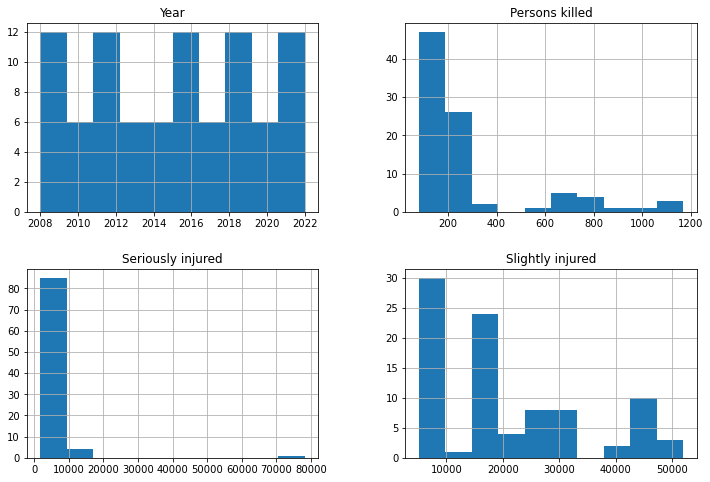

In [85]:
# This code snippet allows us to quickly visualize the distribution of each numerical variable in our dataset. So, below are the histogram that gives an overall insight about all numerical columns in our datasets and eventually we can see there are 4 numerical coulumns.

# Histograms
df.hist(figsize=(12, 8))
plt.show()


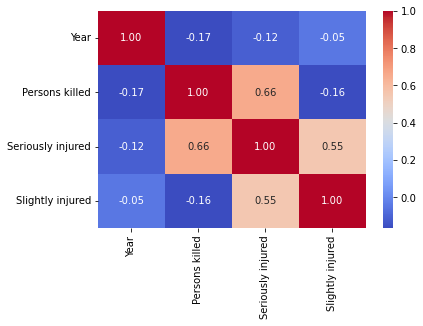

In [8]:
# This code snippet allows us to quickly visualize the correlation between pairs of numerical variables in our dataset.
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



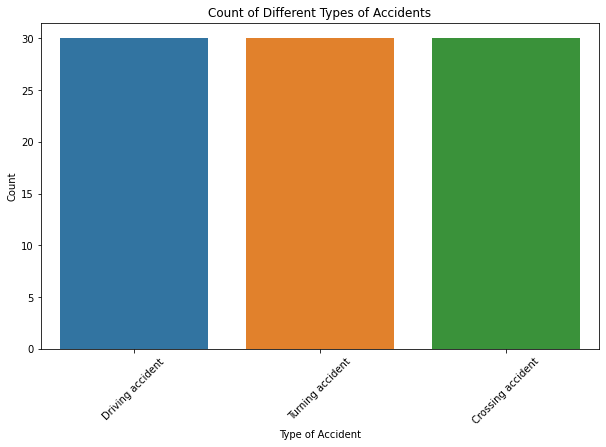

In [9]:
# As it is an accident related daaset, to understand data better, we visualize all kinds of accident in dataset.

# Count plot for type of accident
plt.figure(figsize=(10, 6))
sns.countplot(x='Kind of accident', data=df)
plt.title('Count of Different Types of Accidents')
plt.xlabel('Type of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

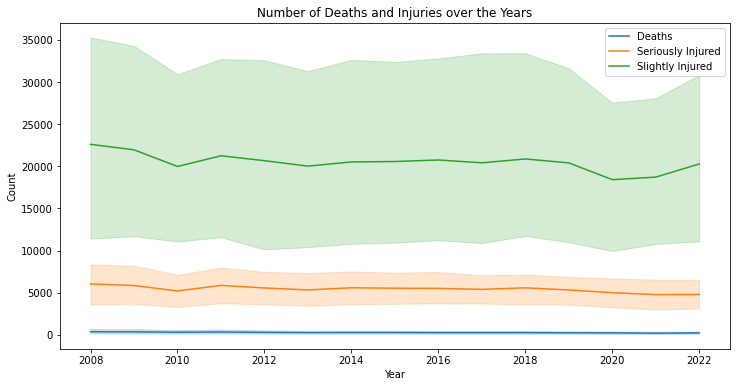

In [13]:
# This section will give us a clean visualization of an overview of the number of deaths and all other injuries over the years.

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Persons killed', data=df, label='Deaths')
sns.lineplot(x='Year', y='Seriously injured', data=df, label='Seriously Injured')
sns.lineplot(x='Year', y='Slightly injured', data=df, label='Slightly Injured')
plt.title('Number of Deaths and Injuries over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Till now, we have a general overview of the datasets.

Now, I will be answering following research questions as part of exploratory data analysis:

1. During the crossing car, which year did most death cases occur in inner town?
2. What is the main type of accident that has caused most death cases over the years?
3. For which area (inner town/out of town) has the least serious injury over the period?
4. What are the turning accident (one of the accident types) trends between the years 2013 to 2022 that fluctuated in terms of slightly injured occurrence?
5. How have the number of deaths, serious injuries, and slightly injured cases varied in recent (last 5) years due to driving accidents?


During crossing the road, the most death cases occurred in the inner town in the year: 2008
Number of death cases: 181

------------------------------------------------------------------------------------------------------

To get an overview of most death cases in mention research question, we may visualise is as such


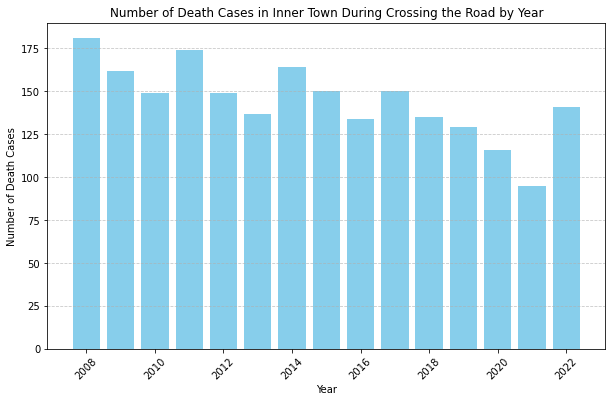

In [21]:
# Research question -1: During the crossing car, which year did most death cases occur in inner town?

inner_town_crossing = df[(df['Kind of accident'] == 'Crossing accident') & (df['Area type'] == 'inner town')]

# Group by year and sum the number of deaths
death_by_year = inner_town_crossing.groupby('Year')['Persons killed'].sum()

# Find the year with the maximum number of deaths
most_death_year = death_by_year.idxmax()
max_death_count = death_by_year.max()

print("During crossing the road, the most death cases occurred in the inner town in the year:", most_death_year)
print("Number of death cases:", max_death_count)



print ("\n------------------------------------------------------------------------------------------------------")

print ("\nTo get an overview of most death cases in mention research question, we may visualise is as such")

# Visialization of research question:

# Group by year and sum the number of deaths
death_by_year = inner_town_crossing.groupby('Year')['Persons killed'].sum().reset_index()

# Plot the number of death cases by year
plt.figure(figsize=(10, 6))
plt.bar(death_by_year['Year'], death_by_year['Persons killed'], color='skyblue')
plt.title('Number of Death Cases in Inner Town During Crossing the Road by Year')
plt.xlabel('Year')
plt.ylabel('Number of Death Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


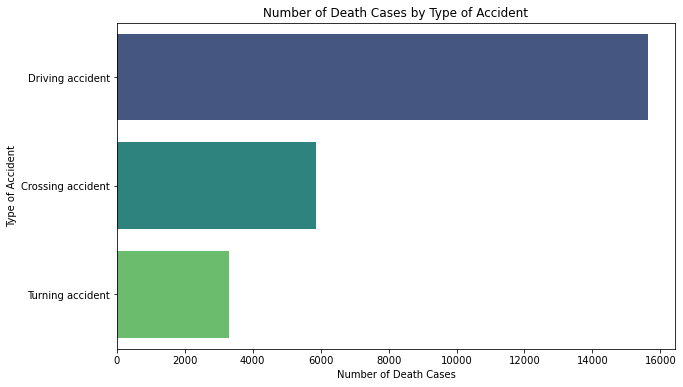

Main types of accidents causing the most death cases:
    Kind of accident  Persons killed
1   Driving accident           15648
0  Crossing accident            5861
2   Turning accident            3288


In [25]:
# Reasearch Question 2: What is the main type of accident that has caused most death cases over the years?


# Group by type of accident and sum the number of deaths
death_by_accident = df.groupby('Kind of accident')['Persons killed'].sum().reset_index()

# Sort the dataframe by the number of deaths
death_by_accident_sorted = death_by_accident.sort_values(by='Persons killed', ascending=False)

# Plot the number of death cases by type of accident
plt.figure(figsize=(10, 6))
sns.barplot(x='Persons killed', y='Kind of accident', data=death_by_accident_sorted, palette='viridis')
plt.title('Number of Death Cases by Type of Accident')
plt.xlabel('Number of Death Cases')
plt.ylabel('Type of Accident')
plt.show()

# Print the main types of accidents causing the most death cases
print("Main types of accidents causing the most death cases:")
print(death_by_accident_sorted.head())


City with the least serious injuries over the period:
     Area type  Seriously injured
1  out of town             211162

------------------------------------------------------------------------------------------------------
To get and overview of least serious injury between the location, lets visualize both area type


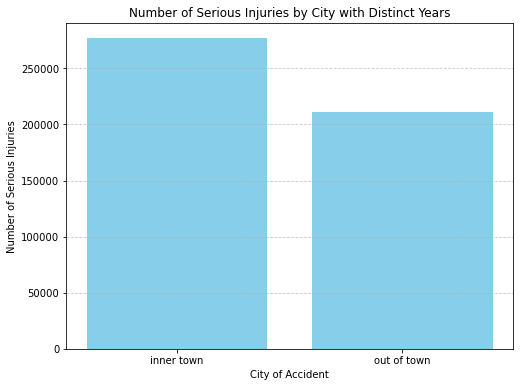

In [26]:
#Research Question 3: For which area (inner town/out of town) has the least serious injury over the period?

# Group by city of accident and sum the number of serious injuries
serious_injuries_by_city = df.groupby('Area type')['Seriously injured'].sum().reset_index()

# Find the city with the least serious injuries
city_least_serious_injuries = serious_injuries_by_city[serious_injuries_by_city['Seriously injured'] == serious_injuries_by_city['Seriously injured'].min()]

print("City with the least serious injuries over the period:")
print(city_least_serious_injuries)


print ("\n------------------------------------------------------------------------------------------------------")

print ("To get and overview of least serious injury between the location, lets visualize both area type")

# Visialization of research question:

# Plot the number of serious injuries by city
plt.figure(figsize=(8, 6))
plt.bar(serious_injuries_by_city['Area type'], serious_injuries_by_city['Seriously injured'], color='skyblue')
plt.title('Number of Serious Injuries by City with Distinct Years')
plt.xlabel('City of Accident')
plt.ylabel('Number of Serious Injuries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
